## Week 4

#### Model development

In [1]:
import pandas as pd
import numpy as np

In [3]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression()

In [21]:
X = df[['highway-mpg']]
Y = df['price']

In [22]:
lm.fit(X,Y)

LinearRegression()

In [35]:
Yhat = lm.predict(X)
Yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [26]:
b_0 = lm.intercept_

In [28]:
b_1 = lm.coef_

In [37]:
Yhat_table = b_0 + b_1*X
Yhat_table 

,highway-mpg
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535
...,...
196,15414.771265
197,17879.971400
198,19523.438157
199,16236.504643


### Fitting a Multi-linear Model Estimator

In [38]:
Z = df[['horsepower', 'curb-weight','engine-size', 'highway-mpg']]
lm.fit(Z,Y)

LinearRegression()

In [41]:
Yhat2 = lm.predict(Z)
Yhat2

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

In [42]:
b0 = lm.intercept_

-15806.624626329223

In [46]:
b1, b2, b3, b4 = lm.coef_

#### Model Evaluation Using Visualization

Here we use regression plot

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 48174.20124518666)

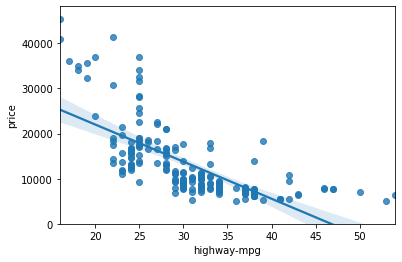

In [55]:
sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(0,)

#### Residual Plot
 It represents the error between the actual alue and the predicted/fitted value

In [58]:
res = Yhat - Y
res

0      2741.504643
1      -263.495357
2       558.238022
3      -178.695492
4      2895.171535
          ...     
196   -1430.228735
197   -1165.028600
198   -1961.561843
199   -6233.495357
200   -4745.028600
Name: price, Length: 201, dtype: float64

Text(0, 0.5, 'price')

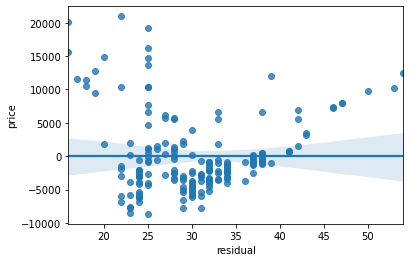

In [66]:
sns.regplot(x = X, y = -res)
plt.xlabel("residual")
plt.ylabel("price")

A more appropriate way to get residual plot s using the attribute resideplot()

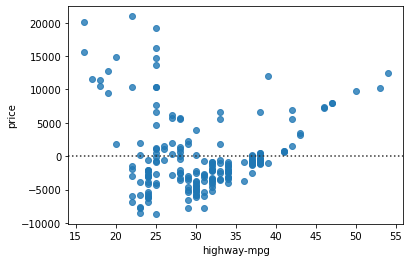

In [65]:
res2 = Yhat2 - Y
sns.residplot(df['highway-mpg'], df['price'])


#### Distribution Plots

It counts the predicted value versus the actual value. These plots are extremel useful for visualizing odels with more than one independent variable or feature

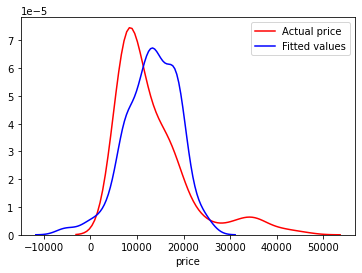

In [75]:
import seaborn as sns
ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual price")
sns.distplot(Yhat, hist = False, color ="b", label = "Fitted values", ax = ax1)

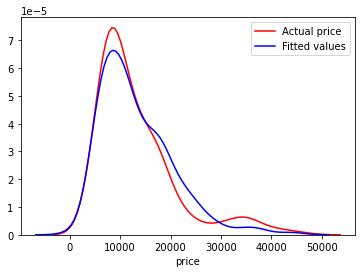

In [78]:
import seaborn as sns
ax1 = sns.distplot(df['price'], hist = False, color = "r", label = "Actual price")
sns.distplot(Yhat2, hist = False, color ="b", label = "Fitted values", ax = ax1)